# Part 2

# The Data

In this notebook we need to explore a dataset that was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015. It's called the Sentiment Labelled Sentences Data Set. The dataset contains sentences labelled with positive or negative sentiment. Score is either positive or negative.


# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import helpers.data_mining_helpers as dmh

column = ['sentence', 'score']
# read file documents and create a dataframe
imdb = pd.read_csv('./doc/imdb_labelled.txt', sep='\t', names=column, header=None)
amazon = pd.read_csv('./doc/amazon_cells_labelled.txt', sep='\t', names=column, header=None)
yelp = pd.read_csv('./doc/yelp_labelled.txt', sep='\t', names=column, header=None)

df = pd.concat([imdb, amazon, yelp], ignore_index = True, axis = 0)

#check the file
df[0:10]

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [2]:
df.replace([1,0], ['positive', 'negative'], inplace=True)
# determine the label (score) of the sentence
print(df['score'][0:10])

0    negative
1    negative
2    negative
3    negative
4    positive
5    negative
6    negative
7    positive
8    negative
9    positive
Name: score, dtype: object


In [3]:
#check the data again
df.iloc[::10, 0:2][0:10]

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",negative
10,And those baby owls were adorable.,positive
20,This if the first movie I've given a 10 to in ...,positive
30,The problem was the script.,negative
40,"Frankly, after Cotton club and Unfaithful, it ...",negative
50,The directing and the cinematography aren't qu...,negative
60,The movie had you on the edge of your seat and...,positive
70,There were several moments in the movie that j...,negative
80,All the pretty pictures in the world cannot ma...,negative
90,"Also, it's a real treat to see Anthony Quinn p...",positive


In [4]:
df.loc[::10, 'sentence'][0:10]

0     A very, very, very slow-moving, aimless movie ...
10                 And those baby owls were adorable.  
20    This if the first movie I've given a 10 to in ...
30                        The problem was the script.  
40    Frankly, after Cotton club and Unfaithful, it ...
50    The directing and the cinematography aren't qu...
60    The movie had you on the edge of your seat and...
70    There were several moments in the movie that j...
80    All the pretty pictures in the world cannot ma...
90    Also, it's a real treat to see Anthony Quinn p...
Name: sentence, dtype: object

In [5]:
# sort values based on the label order
df.sort_values('score', ascending=False)

,sentence,score
921,The iGo chargers and tips are really great.,positive
2199,Food was so gooodd.,positive
1156,Plantronics Bluetooth Excelent Buy.,positive
1155,Works great.,positive
1153,I especially love the long battery life.,positive
...,...,...
1245,Save your money.... I've had this item for 11 ...,negative
1243,Plug was the wrong size.,negative
1242,Pretty piece of junk.,negative
1237,This results in the phone being either stuck a...,negative


In [6]:
df.sort_index(axis = 1)

,score,sentence
0,negative,"A very, very, very slow-moving, aimless movie ..."
1,negative,Not sure who was more lost - the flat characte...
2,negative,Attempting artiness with black & white and cle...
3,negative,Very little music or anything to speak of.
4,positive,The best scene in the movie was when Gerardo i...
...,...,...
2743,negative,I think food should have flavor and texture an...
2744,negative,Appetite instantly gone.
2745,negative,Overall I was not impressed and would not go b...
2746,negative,"The whole experience was underwhelming, and I ..."


## Data Mining

In [7]:
df.isnull()

,sentence,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2743,False,False
2744,False,False
2745,False,False
2746,False,False


In [8]:
import helpers.data_mining_helpers as dmh

df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [9]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
2747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

In [10]:
#Insert dummy record into our current database to test reliablity
dummy_dict = [{'sentence': 'This is a dummy record!'}]

In [11]:
df = df.append(dummy_dict, ignore_index=True)
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,1


In [12]:
#Drop the values and check if we gotten rid of it.
df.dropna(inplace=True)
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [13]:
df.duplicated()
df.drop_duplicates(keep='first', inplace=True)

# Data Preprocessing

In [14]:
df_sample = df.sample(n=1000) #random state

positive    508
negative    492
Name: score, dtype: int64


<AxesSubplot:title={'center':'Sentiment Distribution'}>

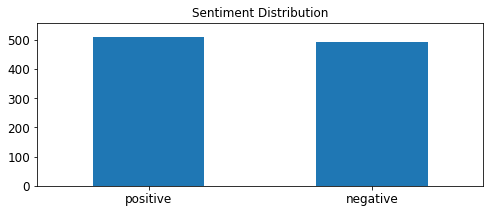

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

upper_bound = max(df_sample.score.value_counts()) + 50

print(df_sample.score.value_counts())

# plot barchart for data sample
df_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'Sentiment Distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

In [16]:
import numpy as np
ori = df.score.value_counts()
sample = df_sample.score.value_counts()
ori

positive    1376
negative    1355
Name: score, dtype: int64

In [17]:
sample

positive    508
negative    492
Name: score, dtype: int64

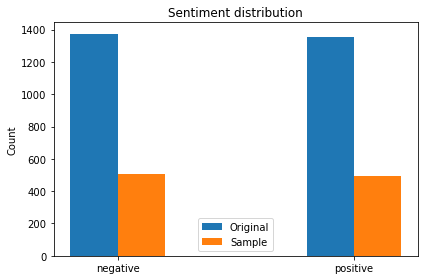

In [18]:
sentiment = ['negative','positive']

X_axis = np.arange(len(sentiment))
width = 0.20

fig, ax = plt.subplots()
rects1 = ax.bar(X_axis - width/2, ori, width, label = "Original")
rects2 = ax.bar(X_axis + width/2, sample, width, label = "Sample")

ax.set_ylabel('Count')
ax.set_title('Sentiment distribution')
ax.set_xticks(X_axis)
ax.set_xticklabels(sentiment)
ax.legend()

fig.tight_layout()

plt.show()

In [19]:
import nltk

df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))
df[0:10]["unigrams"]

0    [A, very, ,, very, ,, very, slow-moving, ,, ai...
1    [Not, sure, who, was, more, lost, -, the, flat...
2    [Attempting, artiness, with, black, &, white, ...
3    [Very, little, music, or, anything, to, speak,...
4    [The, best, scene, in, the, movie, was, when, ...
5    [The, rest, of, the, movie, lacks, art, ,, cha...
6                              [Wasted, two, hours, .]
7    [Saw, the, movie, today, and, thought, it, was...
8                             [A, bit, predictable, .]
9    [Loved, the, casting, of, Jimmy, Buffet, as, t...
Name: unigrams, dtype: object

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(min_df=100)
df_counts = count_vect.fit_transform(df.sentence)

In [21]:
# use analyzer and tokenize each sentence
analyze = count_vect.build_analyzer()
analyze(" ".join(list(df[:1].sentence)))

['very',
 'very',
 'very',
 'slow',
 'moving',
 'aimless',
 'movie',
 'about',
 'distressed',
 'drifting',
 'young',
 'man']

In [22]:
#check the shape .. x..
df_counts.shape

(2731, 38)

In [23]:
#convert into  document term matrix
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0],
       [0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0]], dtype=int64)

In [24]:
# find first ten words in the data
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

# obtain the term index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_z = df_counts[0:20, 0:20].toarray()

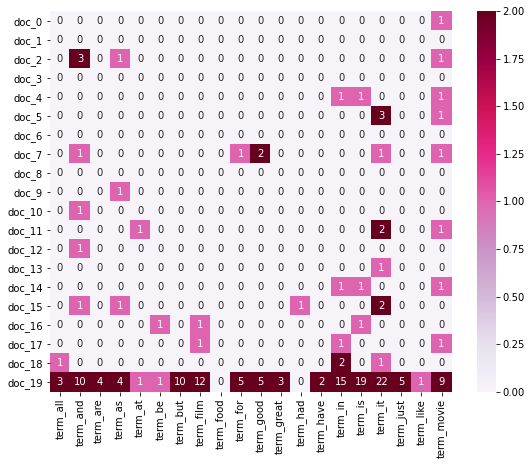

In [25]:
import seaborn as sns

#visualize the terms chart
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=2, annot=True)

In [26]:
from sklearn.decomposition import PCA

# try to reduce the dimensionality using PCA
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

df_reduced.shape #check the shape of the matrix

(2731, 2)

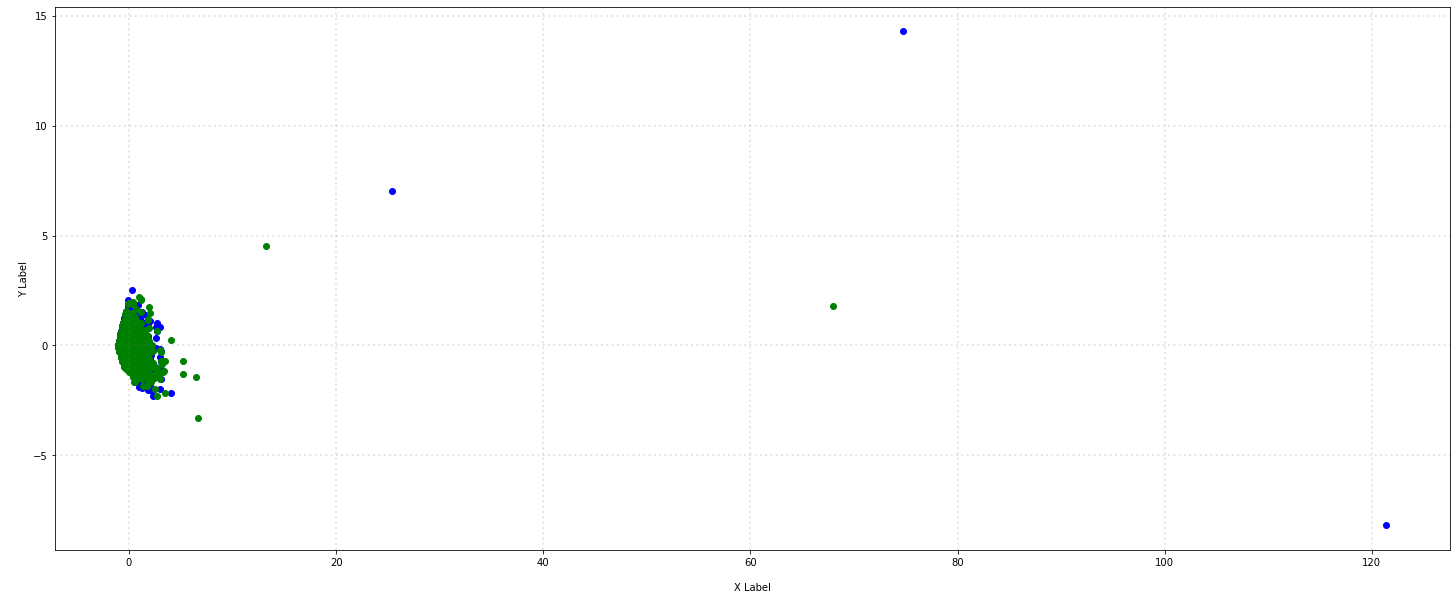

In [27]:
#set up the colour
col = ['blue', 'green']

# create scattered plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

#reduce the dataset
for c, s in zip(col, sentiment):
    xs = df_reduced[df.score == s].T[0]
    ys = df_reduced[df.score == s].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

#title Y label and X label
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

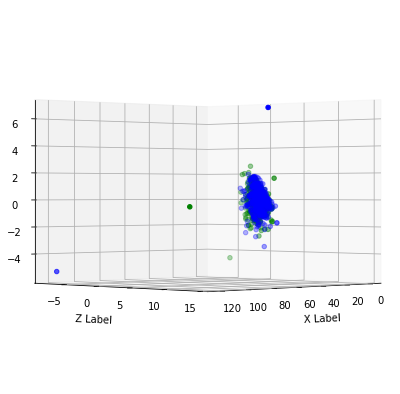

In [28]:
# pca transformation to 3D
df_3d = PCA(n_components = 3).fit_transform(df_counts.toarray())

# create 3D scattered plot 
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
for c, s in zip(col, sentiment):
    xs = df_3d[df['score'] == s].T[0]
    ys = df_3d[df['score'] == s].T[1]
    zs = df_3d[df['score'] == s].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker='o')
    
#set up the angle    
ax.view_init(0, 45)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label') 
ax.set_ylabel('\nY Label')
ax.set_ylabel('\nZ Label')

plt.show()

### Atrribute Transformation / Aggregation

In [29]:
# generate the distribution
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence)

term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [30]:
# try to sort the frequency array
sorted_array = np.sort(term_frequencies)
reverse_array = sorted_array[::-1]

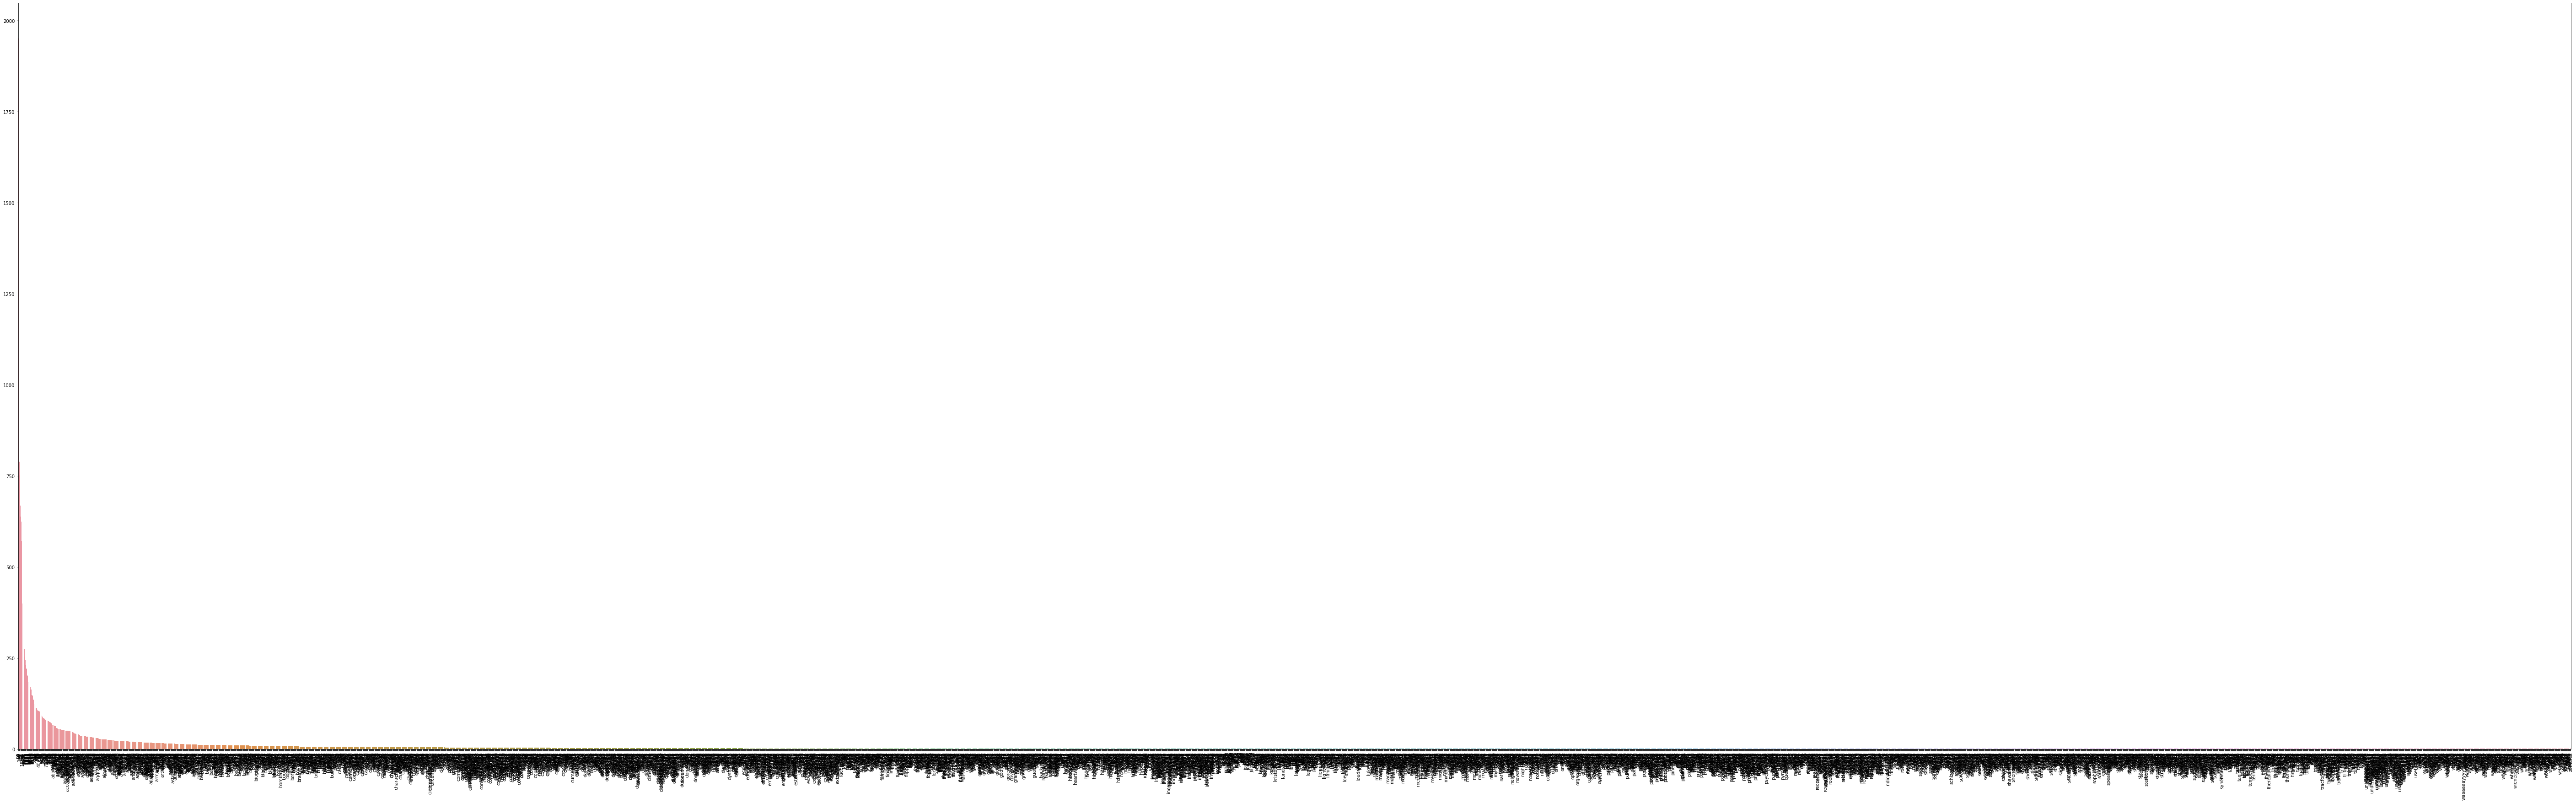

In [31]:
# create a long tail bar
plt.subplots(figsize=(100, 30))
g = sns.barplot(x=count_vect.get_feature_names(), 
                y=reverse_array)
g.set_xticklabels(count_vect.get_feature_names(), rotation = 90)
plt.show()

### Discretization and Binarization

In [32]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb_2 = preprocessing.LabelBinarizer()
mlb_2.fit(df.score)

#make the score into 0 or 1
df['score'] = mlb_2.transform(df['score']).tolist()
df[0:9]

,sentence,score,unigrams
0,"A very, very, very slow-moving, aimless movie ...",[0],"[A, very, ,, very, ,, very, slow-moving, ,, ai..."
1,Not sure who was more lost - the flat characte...,[0],"[Not, sure, who, was, more, lost, -, the, flat..."
2,Attempting artiness with black & white and cle...,[0],"[Attempting, artiness, with, black, &, white, ..."
3,Very little music or anything to speak of.,[0],"[Very, little, music, or, anything, to, speak,..."
4,The best scene in the movie was when Gerardo i...,[1],"[The, best, scene, in, the, movie, was, when, ..."
5,"The rest of the movie lacks art, charm, meanin...",[0],"[The, rest, of, the, movie, lacks, art, ,, cha..."
6,Wasted two hours.,[0],"[Wasted, two, hours, .]"
7,Saw the movie today and thought it was a good ...,[1],"[Saw, the, movie, today, and, thought, it, was..."
8,A bit predictable.,[0],"[A, bit, predictable, .]"


***

# Part 3

### Data Visualization

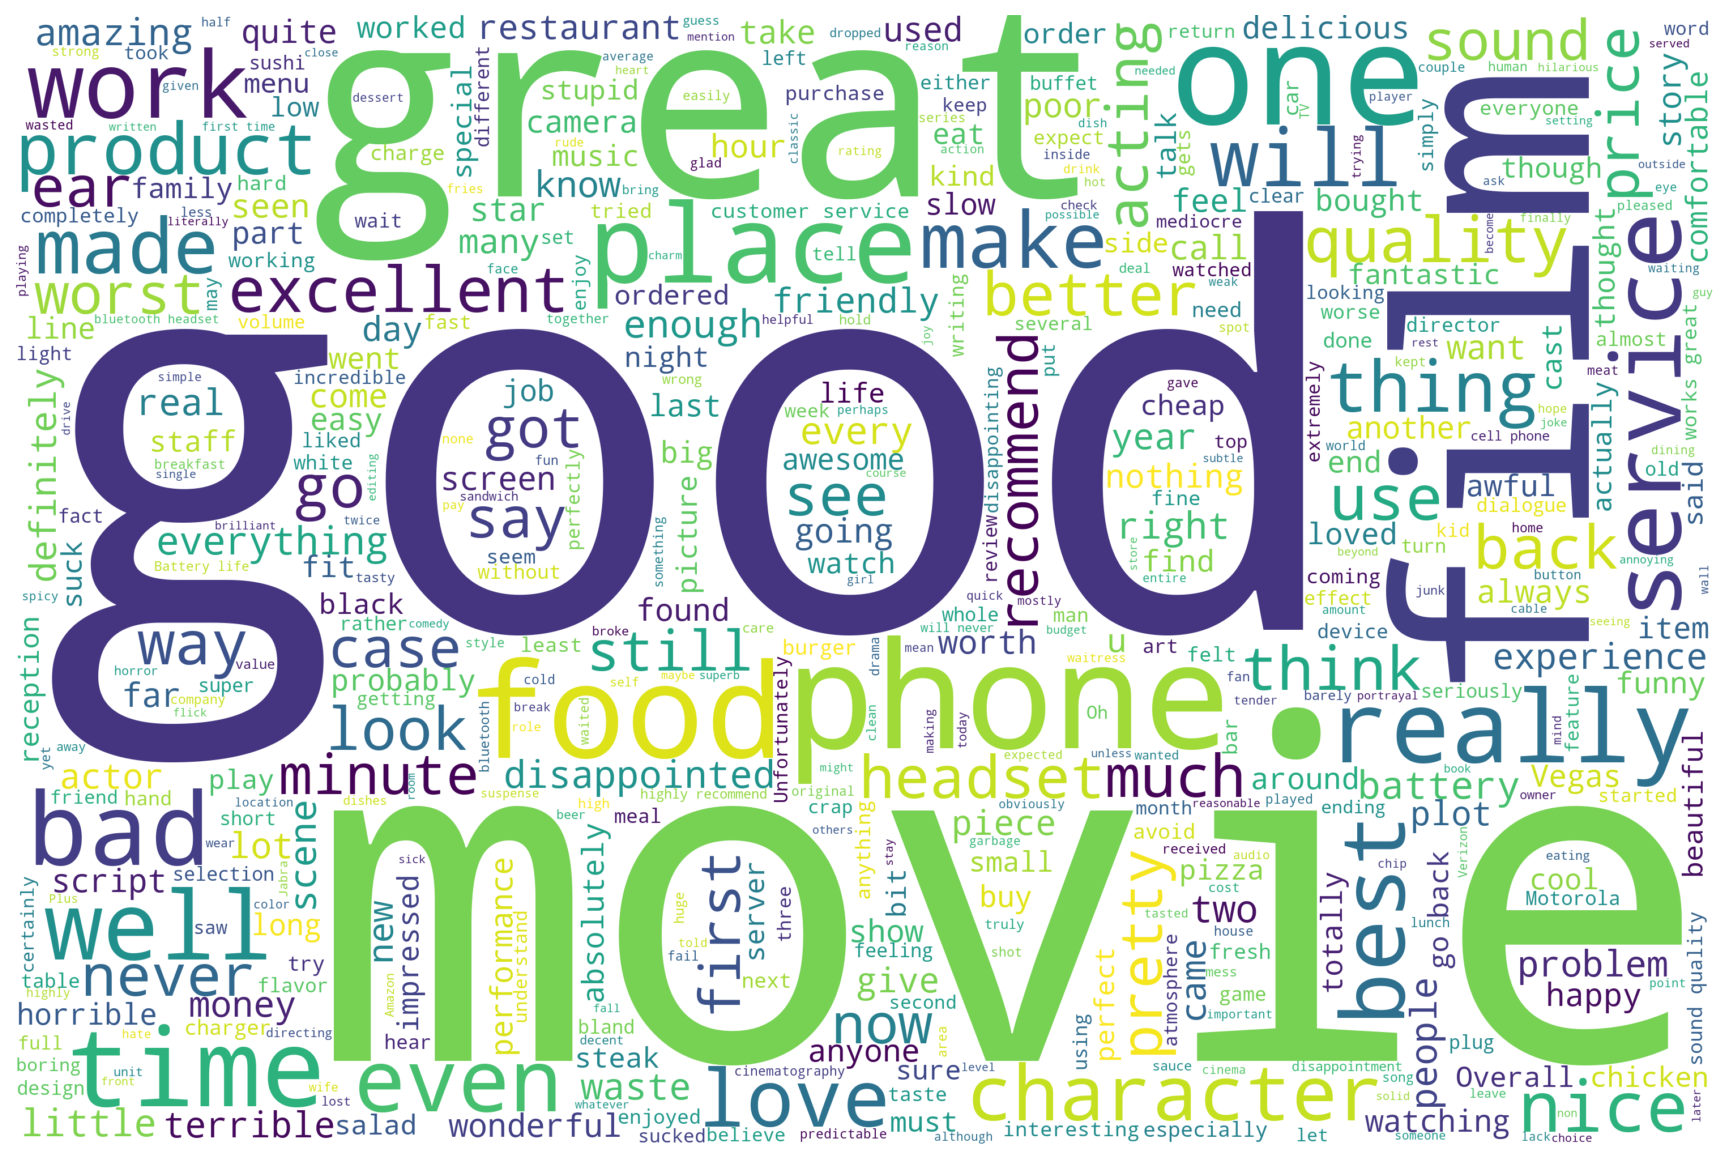

In [33]:

#create a simple WordCloud visual from a column in Pandas
from wordcloud import WordCloud

word_cloud = WordCloud(max_words=500,
                       background_color='white',
                       width=3000,
                       height=2000).generate(' '.join(df.sentence))

plt.figure(figsize=(15,10), dpi=150)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### TF-IDF Features

TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify words in a set of documents. We generally compute a score for each word to signify its importance in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

In [34]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence)

print(df_counts.shape)
print(count_vect.get_feature_names()[0:20])

(2731, 5155)
['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973', '1979', '1980']


In [35]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(lowercase=True, analyzer='word', 
                        stop_words= 'english',ngram_range=(1,1))
tfidf_counts = tfidf_vect.fit_transform(df.sentence)

new_df = pd.DataFrame(tfidf_counts.toarray(), columns = tfidf_vect.get_feature_names())

# after implementing tfidf feature
print(tfidf_counts.shape)
print(tfidf_vect.get_feature_names()[0:20])

(2731, 4896)
['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973', '1979', '1980']


In [36]:
tfidf_vect.vocabulary_

{'slow': 3946,
 'moving': 2822,
 'aimless': 160,
 'movie': 2820,
 'distressed': 1272,
 'drifting': 1339,
 'young': 4882,
 'man': 2639,
 'sure': 4224,
 'lost': 2576,
 'flat': 1693,
 'characters': 712,
 'audience': 303,
 'nearly': 2866,
 'half': 1974,
 'walked': 4717,
 'attempting': 297,
 'artiness': 265,
 'black': 449,
 'white': 4786,
 'clever': 796,
 'camera': 621,
 'angles': 204,
 'disappointed': 1237,
 'ridiculous': 3602,
 'acting': 113,
 'poor': 3240,
 'plot': 3216,
 'lines': 2527,
 'non': 2906,
 'existent': 1546,
 'little': 2540,
 'music': 2842,
 'speak': 4025,
 'best': 425,
 'scene': 3725,
 'gerardo': 1858,
 'trying': 4488,
 'song': 3991,
 'keeps': 2383,
 'running': 3660,
 'head': 2022,
 'rest': 3565,
 'lacks': 2428,
 'art': 262,
 'charm': 724,
 'meaning': 2687,
 'emptiness': 1451,
 'works': 4842,
 'guess': 1957,
 'wasted': 4741,
 'hours': 2128,
 'saw': 3714,
 'today': 4392,
 'thought': 4350,
 'good': 1896,
 'effort': 1417,
 'messages': 2732,
 'kids': 2397,
 'bit': 442,
 'predicta

In [37]:
# display tf-idf values (document, term)
print(tfidf_counts)

  (0, 2639)	0.31812372254160376
  (0, 4882)	0.36600943868640345
  (0, 1339)	0.41192959811618063
  (0, 1272)	0.41192959811618063
  (0, 2820)	0.20121028303512595
  (0, 160)	0.41192959811618063
  (0, 2822)	0.35687234424222064
  (0, 3946)	0.296534919448366
  (1, 4717)	0.36721452419721773
  (1, 1974)	0.34841468305101764
  (1, 2866)	0.38494950868682637
  (1, 303)	0.37533959253347016
  (1, 712)	0.287106618593378
  (1, 1693)	0.38494950868682637
  (1, 2576)	0.34841468305101764
  (1, 4224)	0.3204460045744932
  (2, 1546)	0.31046565019199945
  (2, 2906)	0.2631473037662726
  (2, 2527)	0.2581036643438001
  (2, 3216)	0.21358446411529022
  (2, 3240)	0.2121589670670675
  (2, 113)	0.19925069002044477
  (2, 3602)	0.2631473037662726
  (2, 1237)	0.20129287323521208
  (2, 204)	0.2951507510997552
  :	:
  (2726, 4342)	0.3719055654062549
  (2727, 2260)	0.5987406383944426
  (2727, 236)	0.5987406383944426
  (2727, 1894)	0.5319955788068456
  (2728, 2194)	0.7040485972404065
  (2728, 3016)	0.7101517955506524
  (272

### Naive Bayes Classifier

Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.
Multinomial Naive Bayes is more suitable because it describes the probability of observing counts among a number of categories

In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
df_counts.shape

(2731, 5155)

In [76]:
# print(df['score'].values[:10])
new_df_score = np.empty(df['score'].values.size, dtype=int)
# print(new_df_score.size)
#change the type of the list
for i in range(len(df['score'].values)):
    new_df_score[i] = df['score'].values[i][0]
new_df_score[:10]

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [77]:
#term frequency
mnb_term_frequency = MultinomialNB()

mnb_term_frequency.fit(df_counts, new_df_score)
%time mnb_term_frequency.fit(df_counts, new_df_score)

#TF-IDF
mnb_tf_idf = MultinomialNB()
mnb_tf_idf.fit(tfidf_counts, new_df_score)
%time mnb_tf_idf.fit(tfidf_counts, new_df_score)

Wall time: 3 ms
Wall time: 3 ms


MultinomialNB()

In [84]:
print("The accuracy of term frequency: ", (mnb_term_frequency.score(df_counts, new_df_score))*100, "%")
print("The accuracy of TF-IDF: ", (mnb_tf_idf.score(tfidf_counts, new_df_score))*100, "%")

The accuracy of term frequency:  94.06810692054192 %
The accuracy of TF-IDF:  94.72720615159282 %


In [86]:
#testing the accuracy of the classifier
#test with a single random sentence from the data set
# when the result is 1, it means negative
r_sentence = df.sample(n = 1)
print('Sentence:',r_sentence.iloc[0].sentence,'\nReal Score:', r_sentence.iloc[0].score)
r_sentence_index = r_sentence.index[0]

df_model = mnb_term_frequency.predict(df_counts[r_sentence_index:r_sentence_index+1])[0]
tfidf_model = mnb_tf_idf.predict(tfidf_counts[r_sentence_index:r_sentence_index+1])[0]

print('Term Frequency MNB Prediction: ', df_model)
print('TF-IDF MNB Prediction: ', tfidf_model)

Sentence: Food was so gooodd. 
Real Score: [1]
Term Frequency MNB Prediction:  1
TF-IDF MNB Prediction:  1


***

# Part 4

I have taken several weeks through this lab task. Nonetheless, since each progression was applied actually rapidly, I tend to skip some detail I, which might be useful in the future. Additionally, each dataset should have been handeled with their different way. So, I think further discussion or esplanation will be a great help for use to implement these data mining steps in the future.

For the data preparation: Rather than show us how to query the dataset, which will take a longer time and print many lines (which might not really useful), I think it is better for you to show us various type of data and how to implement or to transform those data to another kind of dataset.

Data Mining using Pandas : I think these implementations using Pandas will help me a lot in the future as it is fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

Data Preprocessing: Feature Selection and Feature Creation methods empower us to further develop productivity. Highlight Creation builds new elements from our current dataset whose length is more limited. However, I think you can erase some bar and change it into a different models, like circular percantage graph to compare the sample and its original dataset with more details. You might also give us more example about the visualization without giving mush task in this area.

Data Visualization: I think not all of the visualization exercise you give us necessary, maybe you can just give us the example, give us more knowledge about it. Maybe you can also help us to categorize, if this kind of chart really helps you when implementing ... or ... However, I think this visualization will helps me a lot when I want to explain something (that might have a large dataset) to the others.